# Problem statement:
A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. For example, you want to sell a house and you don’t know the price which you can take — it can’t be too low or too high. To find house price you usually try to find similar properties in your
neighbourhood and based on gathered data you will try to assess your house price.

# Data: 

Dataset called "innercity.csv" was provided consisting of data collected on house. Features description are as given below:
1. cid: a notation for a house
2. dayhours: Date house was sold
3. price: Price is prediction target
4. room_bed: Number of Bedrooms/House
5. room_bath: Number of bathrooms/bedrooms
6. living_measure: square footage of the home
7. lot_measure: square footage of the lot
8. ceil: Total floors (levels) in house
9. coast: House which has a view to a waterfront
10. sight: Has been viewed
11. condition: How good the condition is (Overall)
12. quality: grade given to the housing unit, based on grading system
13. ceil_measure: square footage of house apart from basement
14. basement_measure: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. living_measure15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
21. lot_measure15: lotSize area in 2015(implies-- some renovations)
22. furnished: Based on the quality of room 23: total_area: Measure of both living and lot

In [3]:
# Importing standard libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading csv file and storing it as a dataframe

housing_data = pd.read_csv("innercity.csv")

In [5]:
# Having a look at how data and features looks like

housing_data.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666  20141107T000000  808100         4       3.25            3020   
1  8731981640  20141204T000000  277500         4       2.50            2550   
2  5104530220  20150420T000000  404000         3       2.50            2370   
3  6145600285  20140529T000000  300000         2       1.00             820   
4  8924100111  20150424T000000  699000         2       1.50            1400   

   lot_measure  ceil  coast  sight  ...  basement  yr_built  yr_renovated  \
0        13457   1.0      0      0  ...         0      1956             0   
1         7500   1.0      0      0  ...       800      1976             0   
2         4324   2.0      0      0  ...         0      2006             0   
3         3844   1.0      0      0  ...         0      1916             0   
4         4050   1.0      0      0  ...         0      1954             0   

   zipcode      lat     long  living_measure15  lot_measure15  furnished  \
0    98133  47.7174 -122.336              2120           7553          1   
1    98023  47.3165 -122.386              2260           8800          0   
2    98038  47.3515 -121.999              2370           4348          0   
3    98133  47.7049 -122.349              1520           3844          0   
4    98115  47.6768 -122.269              1900           5940          0   

   total_area  
0       16477  
1       10050  
2        6694  
3        4664  
4        5450  

[5 rows x 23 columns]

In [6]:
# Checking the shape of the data

housing_data.shape

(21613, 23)

In [7]:
# Checking info of all data for data types as well as if any null values are present

housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [8]:
# Data in room_bath is in decimals. Rounding off the column to the nearest integer

housing_data.room_bath = housing_data.room_bath.round()

In [9]:
# dayhours is timestamp column hence, replacing T000000

housing_data['dayhours']= [x.strip().replace('T000000','') for x in housing_data.dayhours]

In [10]:
# Converting dayhours to datetime column

housing_data['dayhours'] = pd.to_datetime(housing_data.dayhours)

In [11]:
# Re-checking the changes done

housing_data.head()

cid   dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666 2014-11-07  808100         4        3.0            3020   
1  8731981640 2014-12-04  277500         4        2.0            2550   
2  5104530220 2015-04-20  404000         3        2.0            2370   
3  6145600285 2014-05-29  300000         2        1.0             820   
4  8924100111 2015-04-24  699000         2        2.0            1400   

   lot_measure  ceil  coast  sight  ...  basement  yr_built  yr_renovated  \
0        13457   1.0      0      0  ...         0      1956             0   
1         7500   1.0      0      0  ...       800      1976             0   
2         4324   2.0      0      0  ...         0      2006             0   
3         3844   1.0      0      0  ...         0      1916             0   
4         4050   1.0      0      0  ...         0      1954             0   

   zipcode      lat     long  living_measure15  lot_measure15  furnished  \
0    98133  47.7174 -122.336              2120           7553          1   
1    98023  47.3165 -122.386              2260           8800          0   
2    98038  47.3515 -121.999              2370           4348          0   
3    98133  47.7049 -122.349              1520           3844          0   
4    98115  47.6768 -122.269              1900           5940          0   

   total_area  
0       16477  
1       10050  
2        6694  
3        4664  
4        5450  

[5 rows x 23 columns]

In [12]:
# Describing the data. Having an idea of mean and std deviation of data

housing_data.describe().T

count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
room_bath         21613.0  2.058715e+00  7.555241e-01  0.000000e+00   
living_measure    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
lot_measure       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
ceil              21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
coast             21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
sight             21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition         21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
quality           21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
ceil_measure      21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
basement          21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built          21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated      21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode           21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long              21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
living_measure15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
lot_measure15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   
furnished         21613.0  1.966872e-01  3.975030e-01  0.000000e+00   
total_area        21613.0  1.718687e+04  4.158908e+04  1.423000e+03   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         2.000000e+00  2.000000e+00  2.000000e+00  8.000000e+00  
living_measure    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
ceil              1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
coast             0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition         3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built          1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long             -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05  
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
total_area        7.035000e+03  9.575000e+03  1.300000e+04  1.652659e+06

In [13]:
# checking for any null values

housing_data.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [14]:
# Checking unique values for each column. Few columns seem to be categorical so checking the unique values

print(housing_data.room_bed.value_counts())
print(housing_data.ceil.value_counts())
print(housing_data.coast.value_counts())
print(housing_data.sight.value_counts())
print(housing_data.condition.value_counts())
print(housing_data.quality.value_counts())
print(housing_data.yr_renovated.value_counts())


3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: room_bed, dtype: int64
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: ceil, dtype: int64
0    21450
1      163
Name: coast, dtype: int64
0    19489
2      963
3      510
1      332
4      319
Name: sight, dtype: int64
3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: quality, dtype: int64
0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64


# Findings / Implications:

Some of the columns have lot of values as 0 like basement, year renovated which donot help us much. Almost 95% of the data in both columns have 0 values. This may mean that the data is missing or no basement is there/no renovations done. Therefore we decided to convert these columns to categorical columns so that we can use it for our analysis. 

# EDA Approach:

Exploratory data analysis refers to the critical process of performing investigations on data so as to understand insights, patterns with the help of statistical analysis and graphical illustrations.  It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.

After investigation of data, we conducted series of pre-processing:

- Visualize the data of each column by doing univariate analysis.
- Removing columns "cid" as identification will not have any impact on our data.
- "Basement" column having lot of 0 values hence converting it to "Yes/No" categorical column. 
- "yr_renovation" column also consists of 0 values again converting same to categorical column. Here, an assumption is made that 0 indicates no renovation is done or any data on renovation is not available.
- "dayhours" column is a timestamp column so converting it to datetime column.
- We have added new feature to the data "Age_1" for age of house. This is calculated by subtracting year built from year sold.


# Univariate Analysis

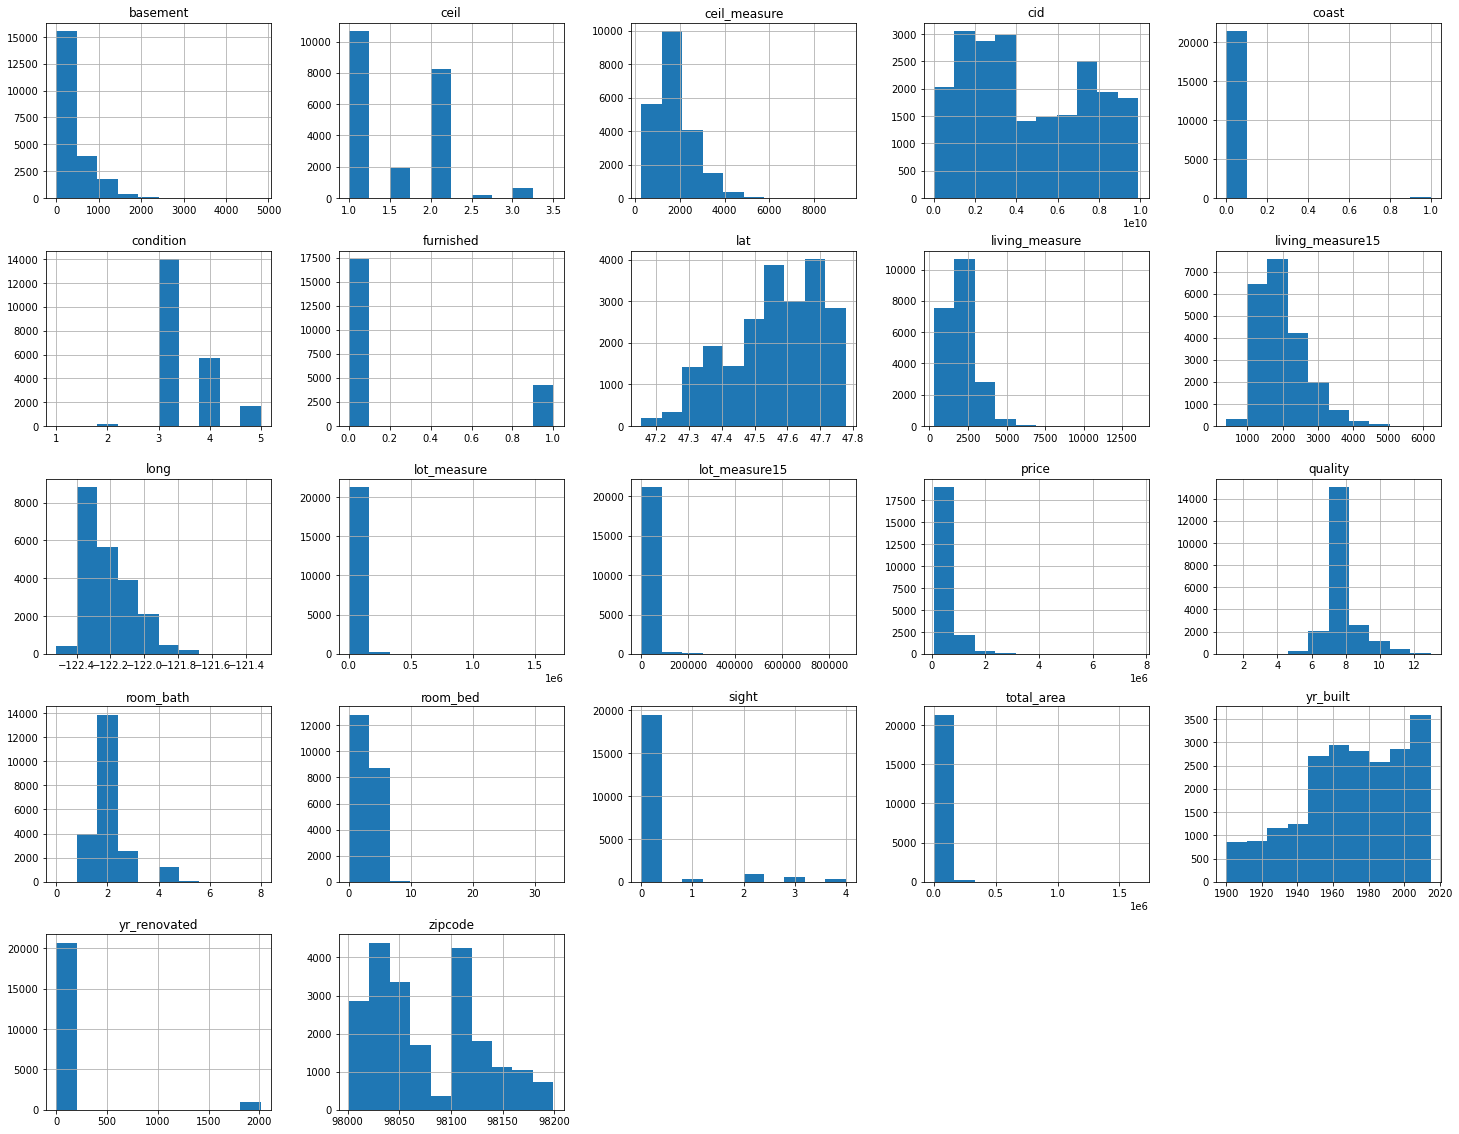

In [15]:
# Checking the distribution of all columns

housing_data.hist(figsize=(25,20))
plt.show()

In [16]:
# Dropping the cid column as it consists only identification and doesn't have any impact on target variable 'price'

housing_data = housing_data.drop(columns='cid')

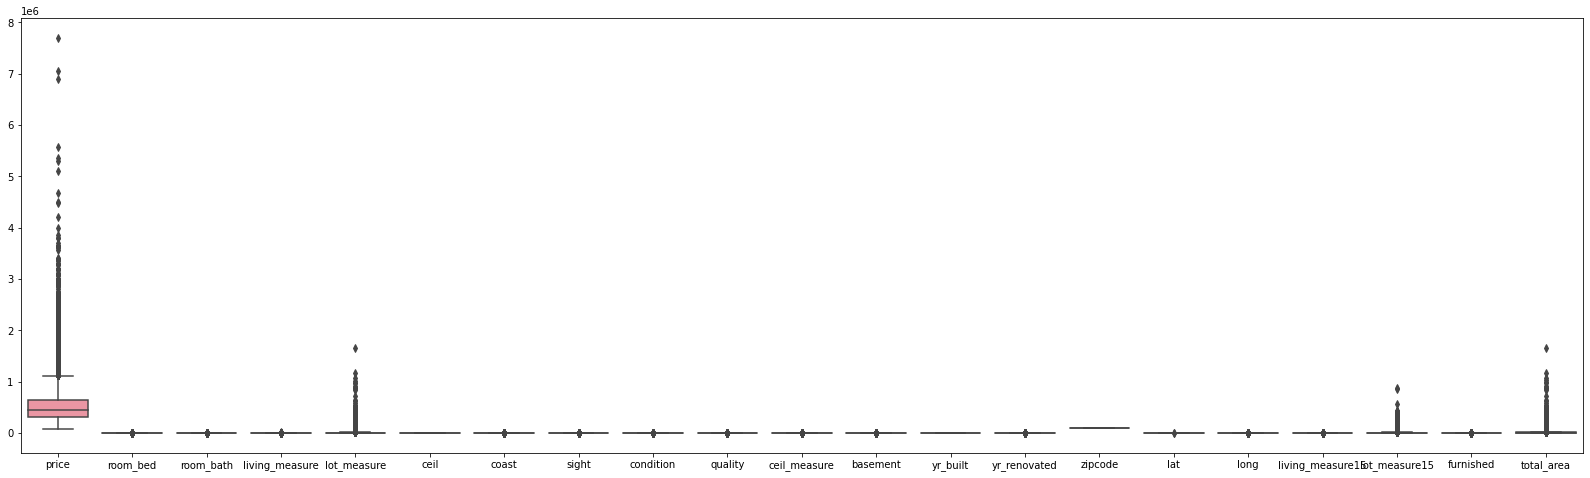

In [17]:
# Plotting a box plot to see how our variables are distributed

plt.figure(figsize = (28,8))
sns.boxplot(data=housing_data)

C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


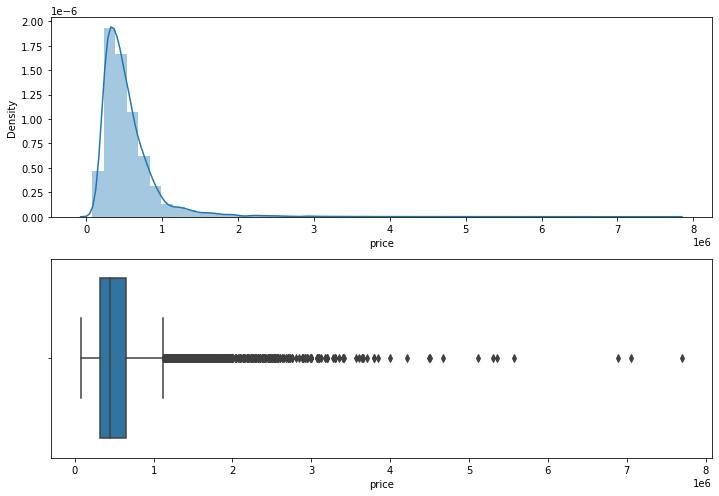

In [18]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(housing_data['price'])
fig.add_subplot(2,1,2)
sns.boxplot(housing_data['price'])
plt.tight_layout()


Inferences from house price distribution:
- Most of the houses lie in the range of 1 million
- There are few outliers also as high as 8 million.
- The trend looks acceptable as common people can buy in certain range only. Above that could be afforded by few people only.

C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\Anacond

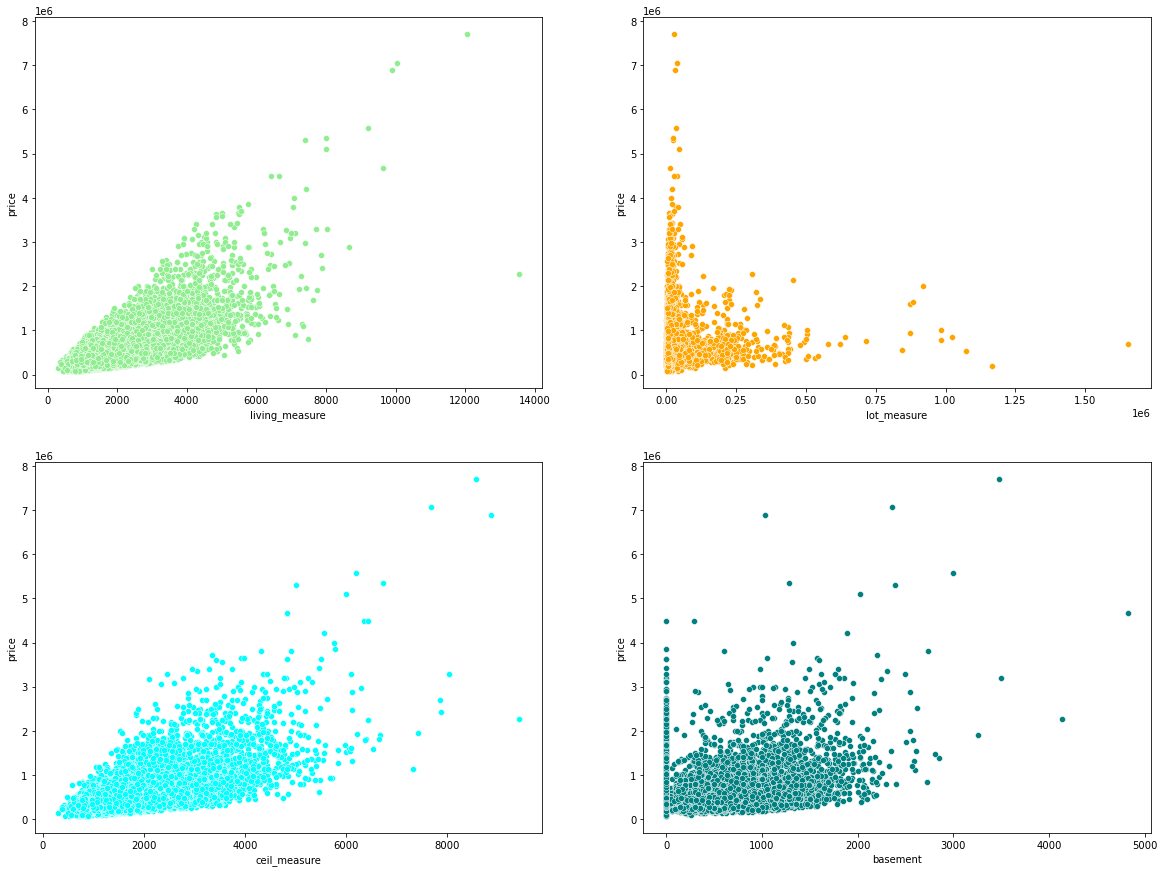

In [19]:
# visualizing with scatter plot square footage of (home,lot,above and basement)
fig = plt.figure(figsize=(20,15))
fig.add_subplot(2,2,1)
sns.scatterplot(housing_data['living_measure'], housing_data['price'], color = 'lightgreen')
fig.add_subplot(2,2,2)
sns.scatterplot(housing_data['lot_measure'],housing_data['price'], color = 'orange')
fig.add_subplot(2,2,3)
sns.scatterplot(housing_data['ceil_measure'],housing_data['price'], color = 'cyan')
fig.add_subplot(2,2,4)
sns.scatterplot(housing_data['basement'],housing_data['price'], color = 'teal')


Inferences from above scatter plot:

- As with price most of the square footage area seems to be concentrated around lower values.
- Definitely there are some outliers with higher area which may contibute to higher price.

C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\Anaconda3\lib\si

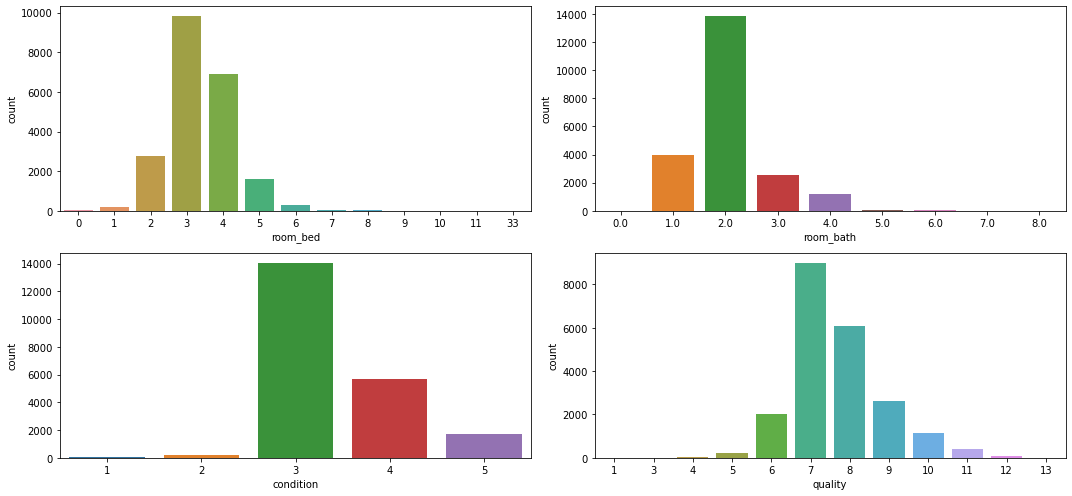

In [20]:
#visualizing bedrooms,bathrooms,floors,grade
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(housing_data['room_bed'])
fig.add_subplot(2,2,2)
sns.countplot(housing_data['room_bath'])
fig.add_subplot(2,2,3)
sns.countplot(housing_data['condition'])
fig.add_subplot(2,2,4)
sns.countplot(housing_data['quality'])
plt.tight_layout()

- Majority of the count is for 3-4 bedrooms. That seems to be the trend in market. Very few counts of bedrooms greater than 6.
- Maximum number of bath a house has is 2.
- Majority of the houses are having condition as greater than 3 which implies they are good houses
- Same conclusion we get from the quality data as well. Majority of the houses are having higher quality

C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


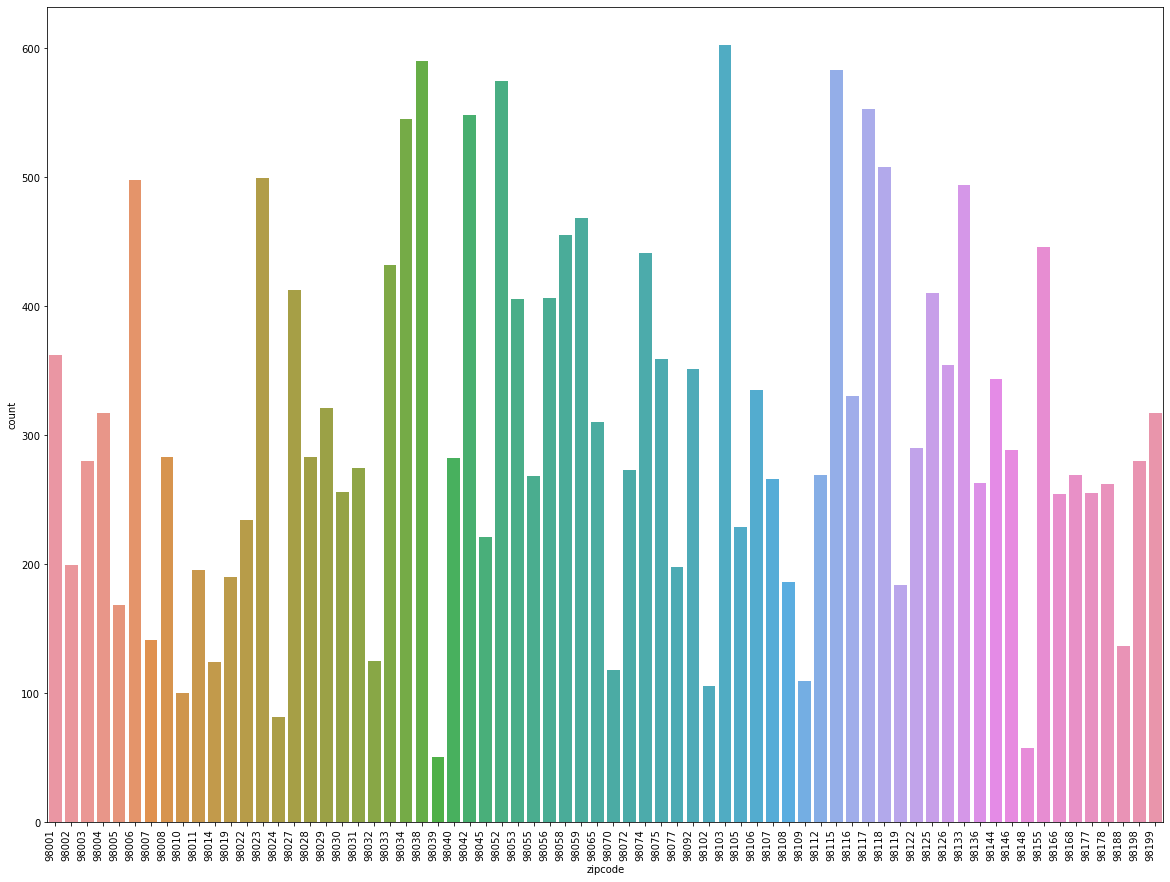

In [21]:
# Plotting distribution of the houses as per zipcode

fig = plt.figure(figsize=(20,15))
ax = sns.countplot(housing_data['zipcode'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

- Distribution of the houses seems to be equal across all zipcodes.

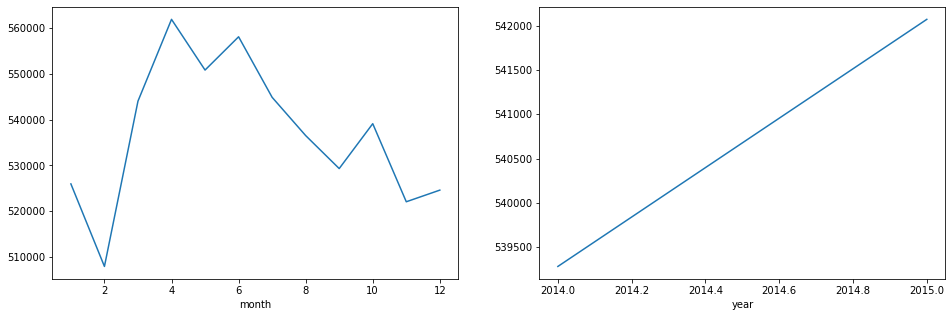

In [22]:
#let's break date to years, months
housing_data['date'] = pd.to_datetime(housing_data['dayhours'])
housing_data['month'] = housing_data['dayhours'].apply(lambda date:date.month)
housing_data['year'] = housing_data['dayhours'].apply(lambda date:date.year)

#data visualization house price vs months and years
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
housing_data.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
housing_data.groupby('year').mean()['price'].plot()

 - The price trend with respect to month and year doesn't give much information as the sold year is 2014-15 for all houses.
 - Lets calculate the age of the house and see how price varies with respect to that

In [23]:
# Converting datetime columns as integer type for calculation purpose

housing_data['year'] = housing_data['year'].astype(int)
housing_data['yr_built'] = housing_data['yr_built'].values.astype(float)

In [24]:
# Calculating age by subtracting year built data from year sold


housing_data['Age_1'] = housing_data['year'] - housing_data['yr_built']

In [25]:
housing_data

dayhours   price  room_bed  room_bath  living_measure  lot_measure  \
0     2014-11-07  808100         4        3.0            3020        13457   
1     2014-12-04  277500         4        2.0            2550         7500   
2     2015-04-20  404000         3        2.0            2370         4324   
3     2014-05-29  300000         2        1.0             820         3844   
4     2015-04-24  699000         2        2.0            1400         4050   
...          ...     ...       ...        ...             ...          ...   
21608 2014-07-01  300000         4        2.0            2303         3826   
21609 2014-06-19  320000         4        2.0            3490         5000   
21610 2014-06-27  483453         4        3.0            2790         5527   
21611 2014-09-17  365000         2        2.0            1440        15000   
21612 2015-03-24  354950         3        1.0             970         5922   

       ceil  coast  sight  condition  ...      lat     long  living_measure15  \
0       1.0      0      0          5  ...  47.7174 -122.336              2120   
1       1.0      0      0          3  ...  47.3165 -122.386              2260   
2       2.0      0      0          3  ...  47.3515 -121.999              2370   
3       1.0      0      0          4  ...  47.7049 -122.349              1520   
4       1.0      0      0          4  ...  47.6768 -122.269              1900   
...     ...    ...    ...        ...  ...      ...      ...               ...   
21608   2.0      0      0          3  ...  47.3258 -122.165              2516   
21609   2.0      0      0          3  ...  47.3772 -122.127              2910   
21610   2.0      0      0          3  ...  47.4827 -121.773              2620   
21611   1.0      0      0          3  ...  47.7648 -122.159              1780   
21612   1.5      0      0          3  ...  47.7190 -122.321              1730   

       lot_measure15  furnished  total_area       date  month  year  Age_1  
0               7553          1       16477 2014-11-07     11  2014   58.0  
1               8800          0       10050 2014-12-04     12  2014   38.0  
2               4348          0        6694 2015-04-20      4  2015    9.0  
3               3844          0        4664 2014-05-29      5  2014   98.0  
4               5940          0        5450 2015-04-24      4  2015   61.0  
...              ...        ...         ...        ...    ...   ...    ...  
21608           4500          0        6129 2014-07-01      7  2014    8.0  
21609           5025          0        8490 2014-06-19      6  2014   11.0  
21610           5509          0        8317 2014-06-27      6  2014    0.0  
21611          15000          0       16440 2014-09-17      9  2014   29.0  
21612           6128          0        6892 2015-03-24      3  2015   66.0  

[21613 rows x 26 columns]

In [26]:
housing_data['lot_measure'].quantile([0,0.10,0.20,0.3,0.4,0.5,0.6,0.75,1.0])

0.00        520.0
0.10       3322.2
0.20       4644.0
0.30       5612.0
0.40       6744.0
0.50       7618.0
0.60       8520.2
0.75      10688.0
1.00    1651359.0
Name: lot_measure, dtype: float64

(55, 26)
(21613, 26)


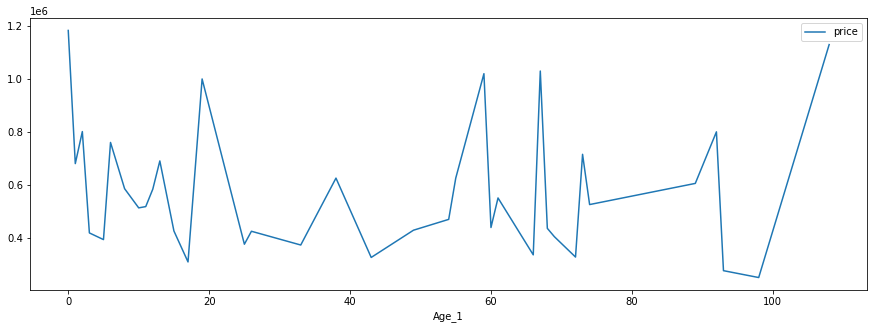

In [27]:
min_lot = 5600
max_lot = 5650
print(housing_data[(housing_data['lot_measure']>min_lot) & (housing_data['lot_measure']<max_lot)].shape)
print(housing_data.shape)
housing_data[(housing_data['lot_measure']>min_lot) & (housing_data['lot_measure']<max_lot)][['Age_1','price']].groupby(['Age_1']).mean().plot(figsize=(15,5))
plt.show()

(872, 26)
(21613, 26)


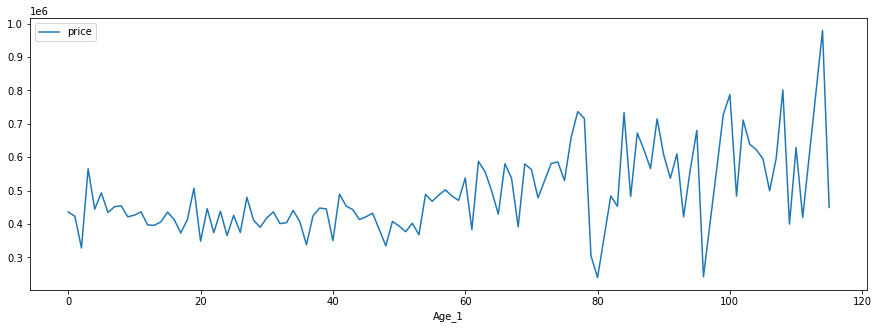

In [28]:
print(housing_data[(housing_data['living_measure']>1900) & (housing_data['living_measure']<2000)].shape)
print(housing_data.shape)
housing_data[(housing_data['living_measure']>1900) & (housing_data['living_measure']<2000)][['Age_1','price']].groupby(['Age_1']).mean().plot(figsize=(15,5))
plt.show()

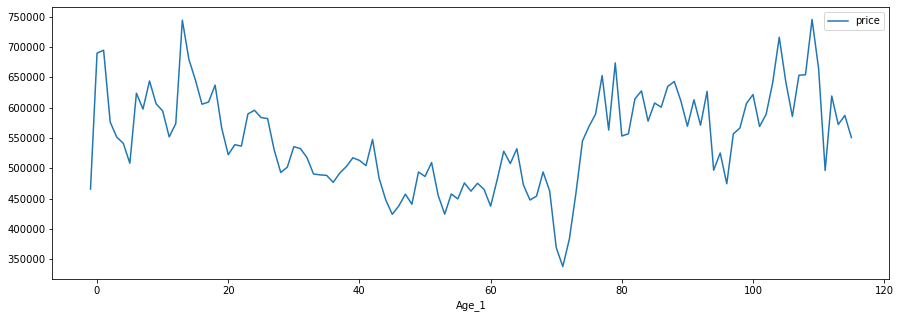

In [29]:
# Plotting trend for change in price with respect to age

housing_data[['Age_1','price']].groupby(['Age_1']).mean().plot(figsize=(15,5))
plt.show()

- Price seems to increase upto 15-18 years after which it seems to start falling.
- Again after 70 years it starts showing an upward trend
- The upward trend could be due to some renovations or change in market trend

In [30]:
housing_data['have_basement'] = housing_data['basement'].apply(lambda x: 0 if x==0 else 1)

In [31]:
housing_data['Is_renovated'] = housing_data['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

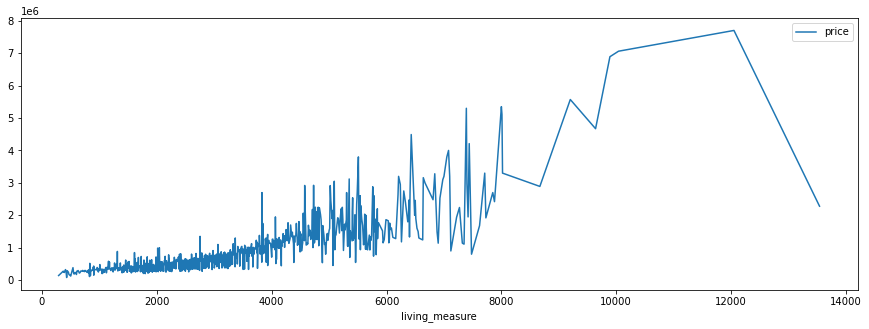

In [32]:
housing_data[['living_measure','price']].groupby(['living_measure']).mean().plot(figsize=(15,5))
plt.show()

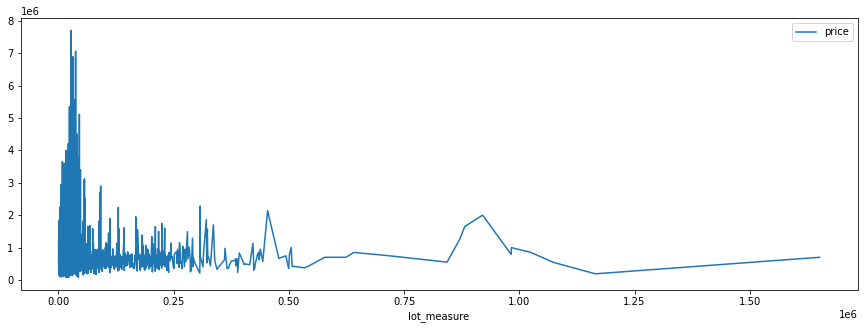

In [33]:
housing_data[['lot_measure','price']].groupby(['lot_measure']).mean().plot(figsize=(15,5))
plt.show()

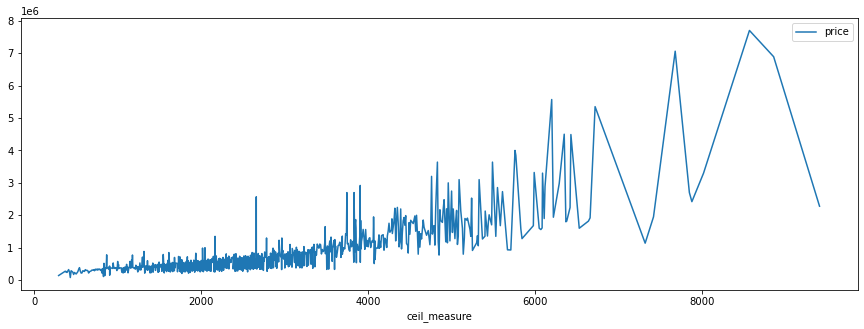

In [34]:
housing_data[['ceil_measure','price']].groupby(['ceil_measure']).mean().plot(figsize=(15,5))
plt.show()

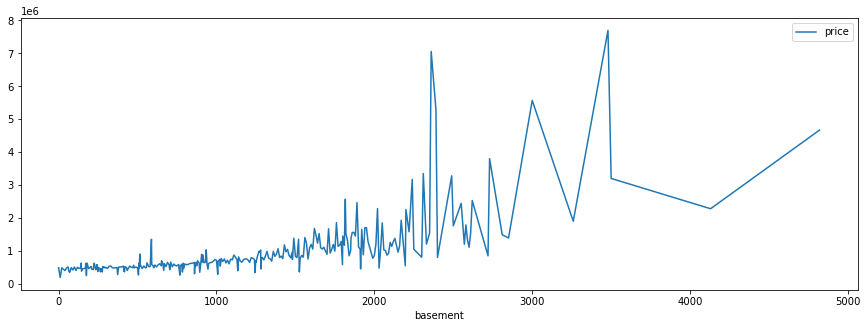

In [35]:
housing_data[['basement','price']].groupby(['basement']).mean().plot(figsize=(15,5))
plt.show()

In [36]:
housing_data.zipcode.nunique()

70

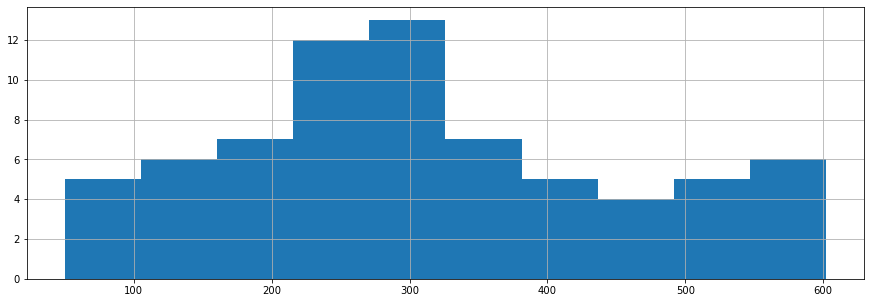

In [37]:
housing_data.groupby(['zipcode']).size().hist(figsize=(15,5))
plt.show()

In [38]:
housing_data.groupby(['zipcode']).size().reset_index().rename(columns={0: 'count'}).sort_values(by='count')['count'].quantile([0.1,0.25,0.5,0.75,1.0])

0.10    123.4
0.25    204.5
0.50    282.5
0.75    409.0
1.00    602.0
Name: count, dtype: float64

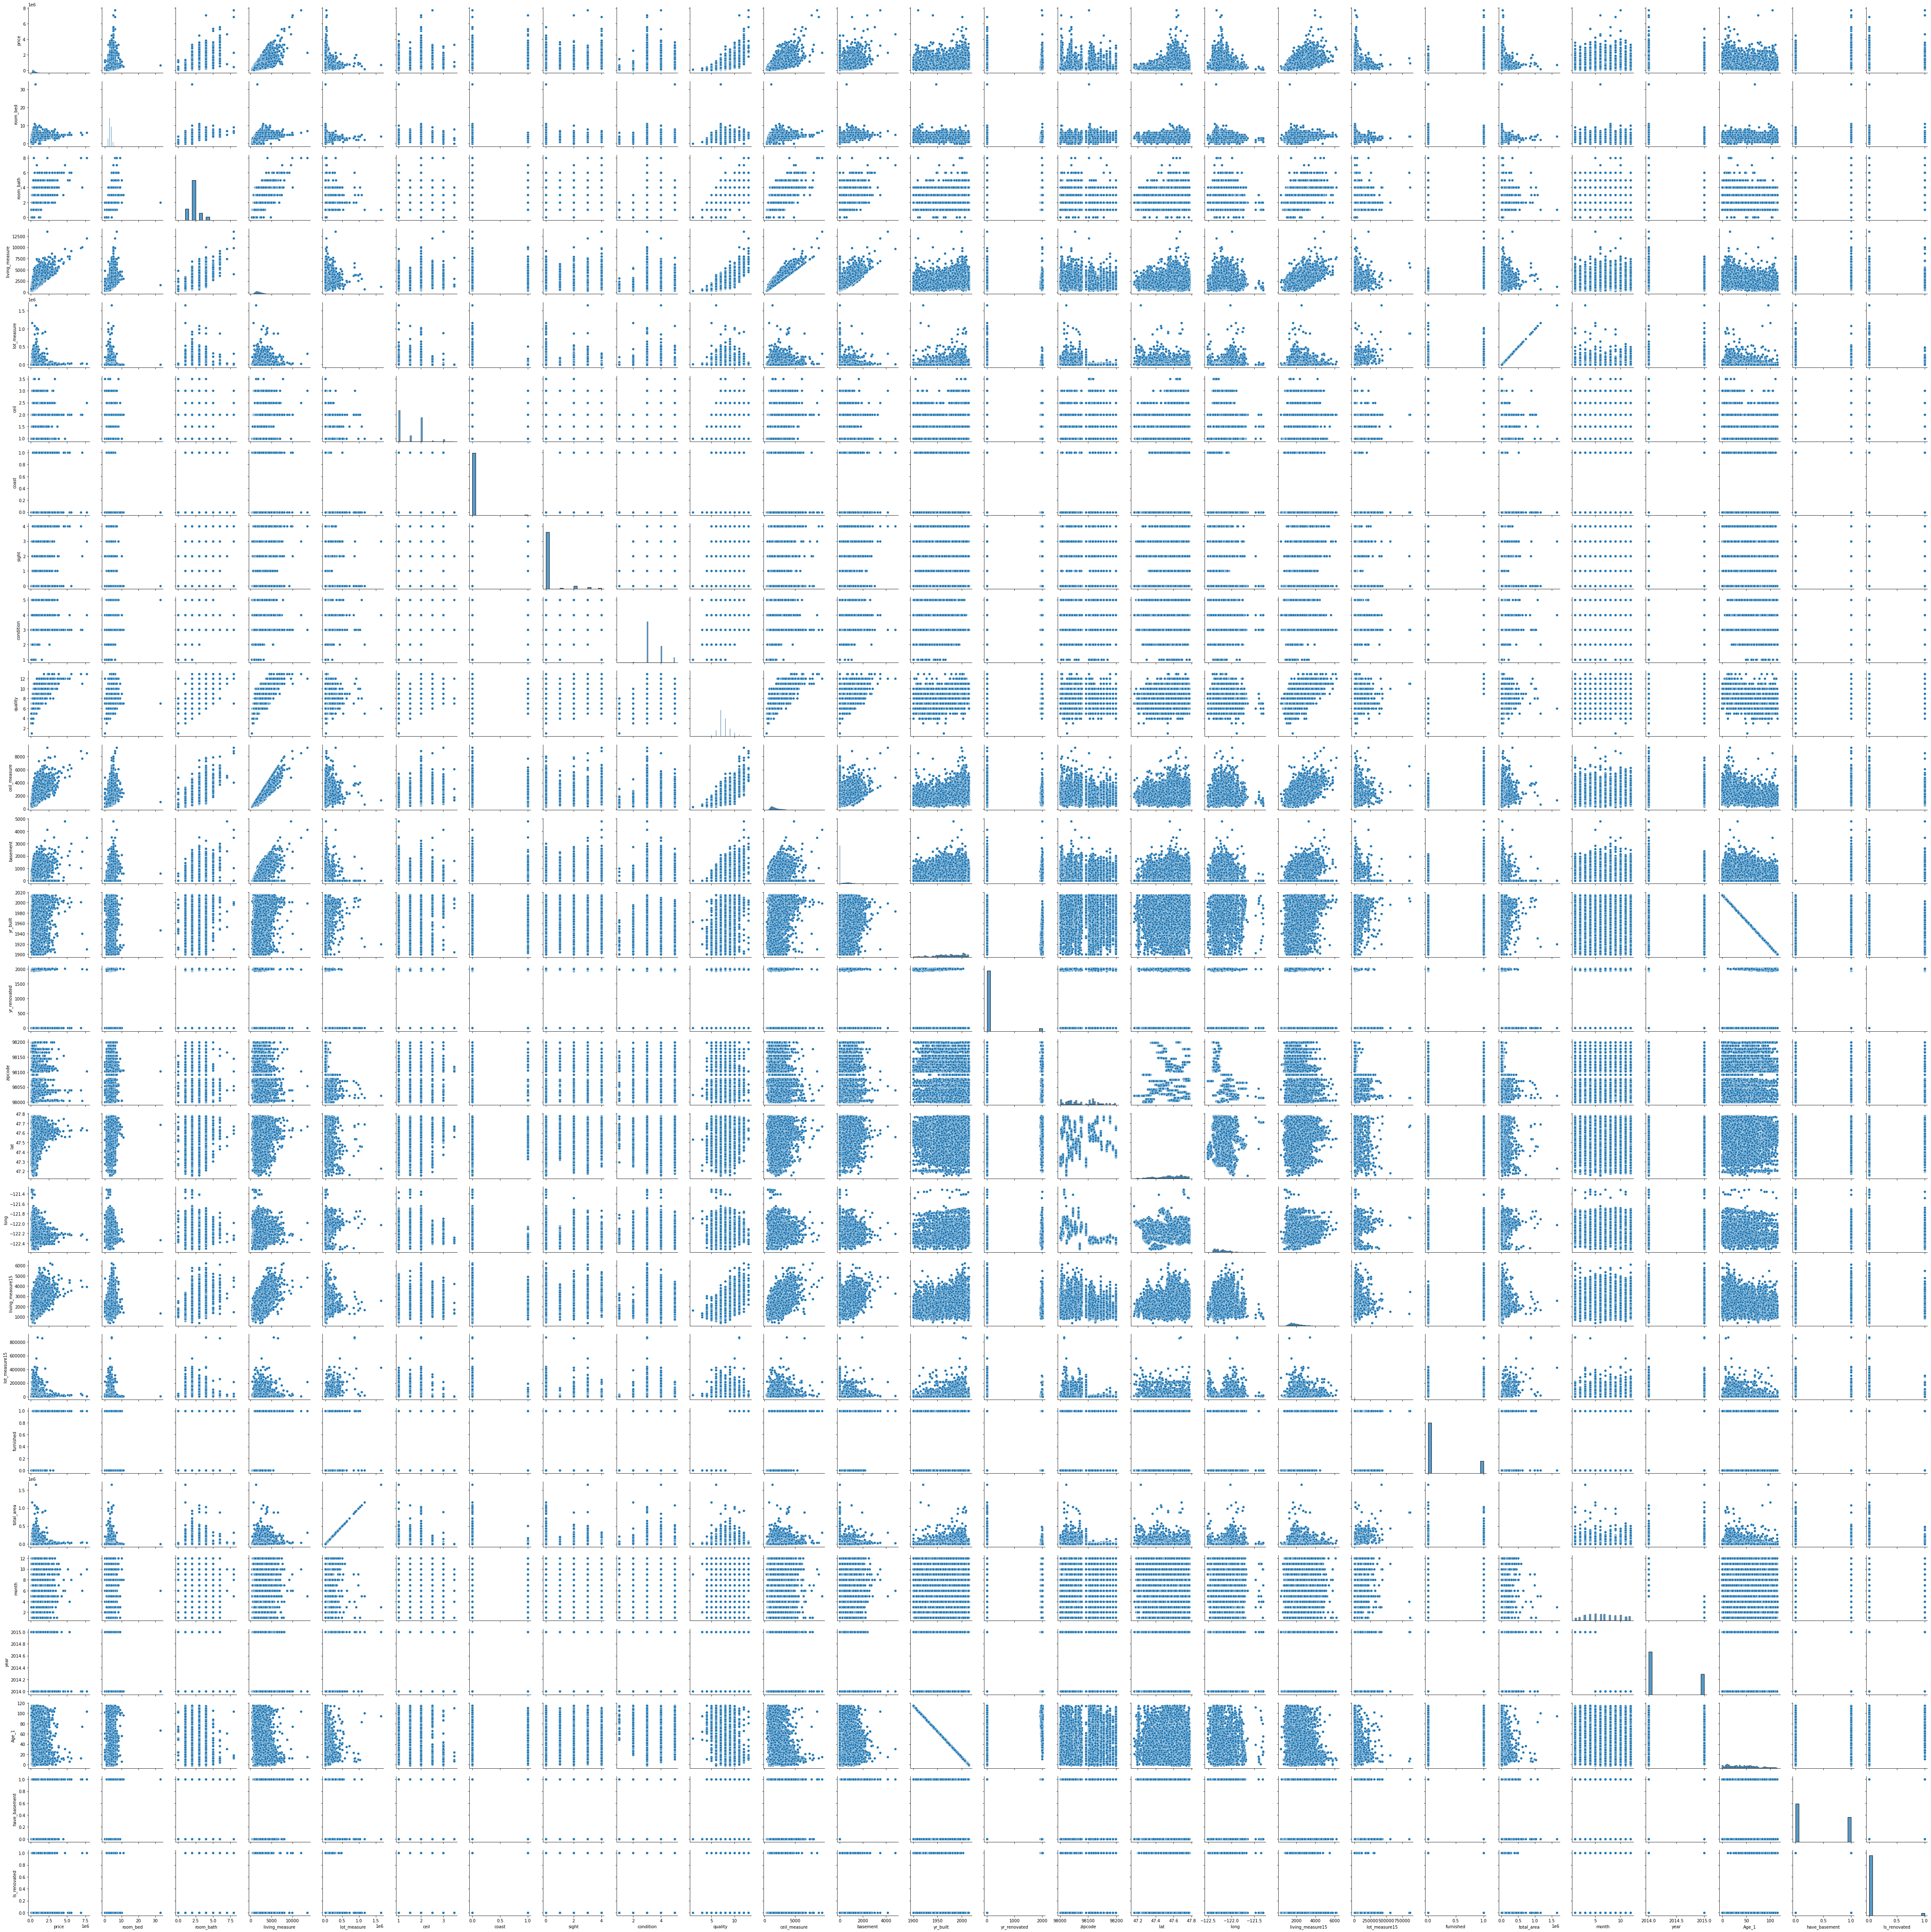

In [39]:
# Bi-variate Analysis
sns.pairplot(housing_data)

In [40]:
housing_data.corr()['price'].sort_values(ascending=False)

price               1.000000
living_measure      0.702044
quality             0.667463
ceil_measure        0.605566
living_measure15    0.585374
furnished           0.565991
room_bath           0.518929
sight               0.397346
basement            0.323837
room_bed            0.308338
lat                 0.306919
coast               0.266331
ceil                0.256786
have_basement       0.180226
yr_renovated        0.126442
Is_renovated        0.126101
total_area          0.104796
lot_measure         0.089655
lot_measure15       0.082456
yr_built            0.053982
condition           0.036392
long                0.021571
year                0.003554
month              -0.010053
zipcode            -0.053168
Age_1              -0.053921
Name: price, dtype: float64

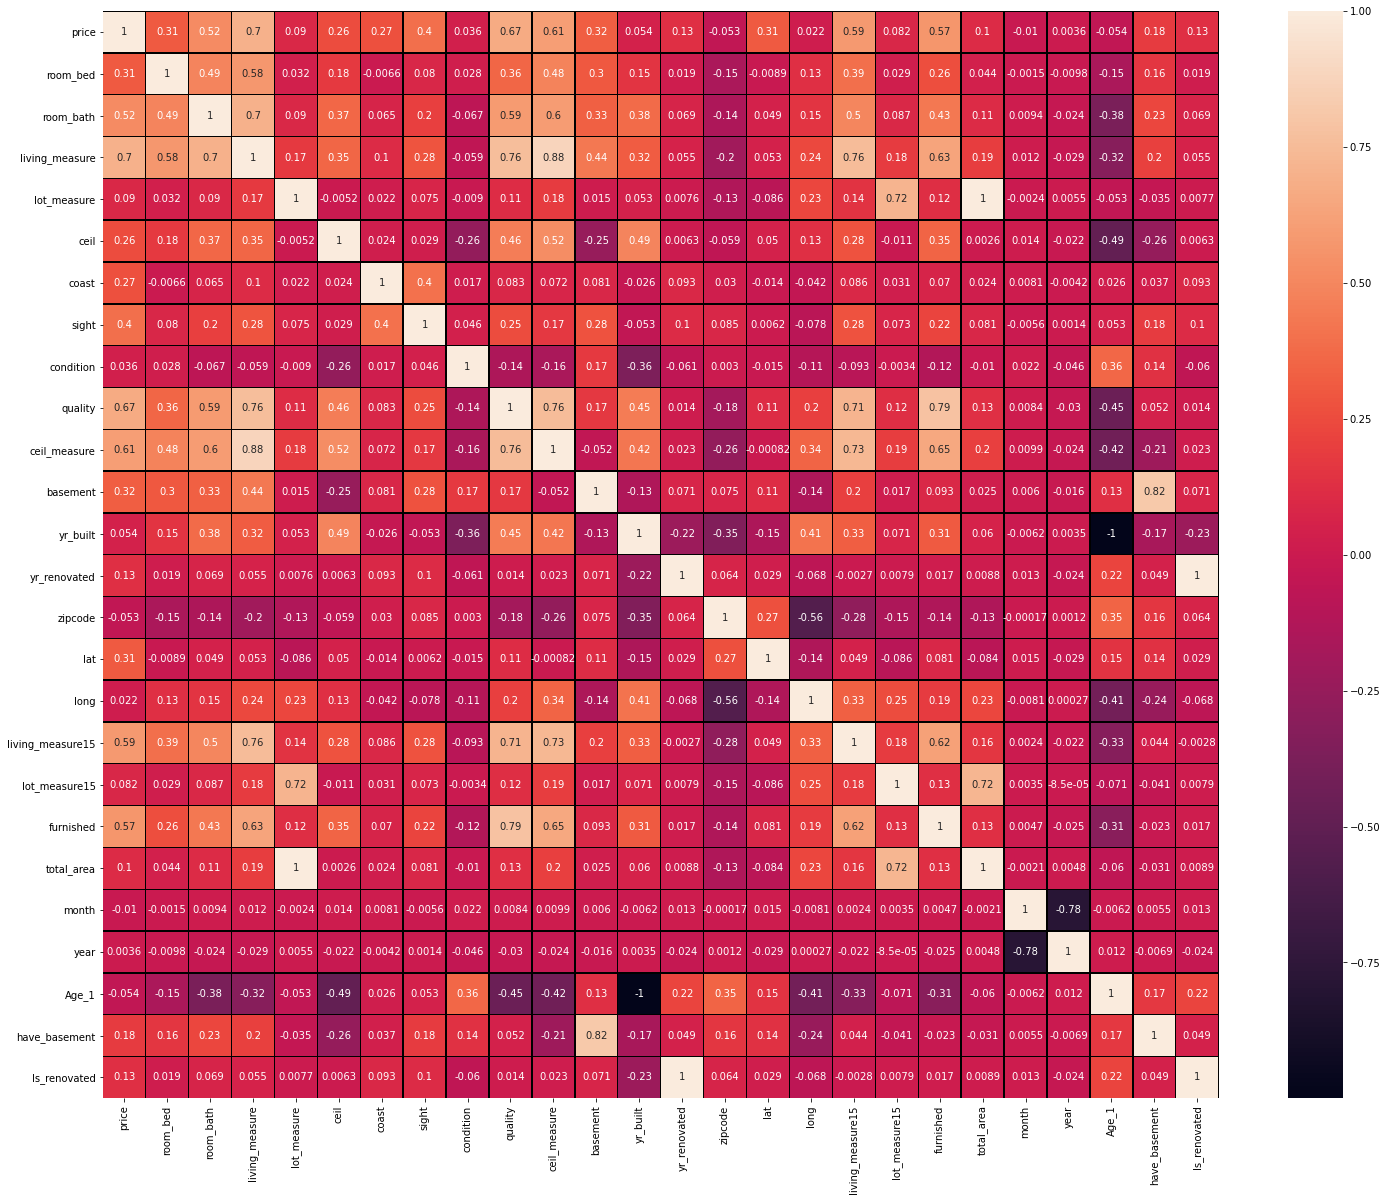

In [41]:
plt.figure(figsize=(25,20))
sns.heatmap(housing_data.corr(),annot=True, linewidths=0.4, linecolor='black')
plt.show()

In [42]:
# Based on our co-relation matrix and other analysis done on data we are now removing some columns

list1 = ['dayhours', 'yr_renovated', 'lot_measure', 'lot_measure15','date', 'basement', 'yr_built','month', 'year', 'zipcode']
housing_data1 = housing_data.drop(columns=list1)



In [43]:
# housing_data1['room_bed']=housing_data1['room_bed'].astype('category')
# housing_data1['room_bath']=housing_data1['room_bath'].astype('category')
# housing_data1['ceil']=housing_data1['ceil'].astype('category')
housing_data1['coast']=housing_data1['coast'].astype('category')
housing_data1['sight']=housing_data1['sight'].astype('category')
housing_data1['Is_renovated']=housing_data1['Is_renovated'].astype('category')
housing_data1['have_basement']=housing_data1['have_basement'].astype('category')
housing_data1['condition']=housing_data1['condition'].astype('category')
housing_data1['quality']=housing_data1['quality'].astype('category')

In [44]:
housing_data['coast'] = housing_data['coast'].astype(float)
housing_data['sight'] = housing_data['sight'].astype(float)

In [45]:
housing_data1.head()

price  room_bed  room_bath  living_measure  ceil coast sight condition  \
0  808100         4        3.0            3020   1.0     0     0         5   
1  277500         4        2.0            2550   1.0     0     0         3   
2  404000         3        2.0            2370   2.0     0     0         3   
3  300000         2        1.0             820   1.0     0     0         4   
4  699000         2        2.0            1400   1.0     0     0         4   

  quality  ceil_measure      lat     long  living_measure15  furnished  \
0       9          3020  47.7174 -122.336              2120          1   
1       8          1750  47.3165 -122.386              2260          0   
2       8          2370  47.3515 -121.999              2370          0   
3       6           820  47.7049 -122.349              1520          0   
4       8          1400  47.6768 -122.269              1900          0   

   total_area  Age_1 have_basement Is_renovated  
0       16477   58.0             0            0  
1       10050   38.0             1            0  
2        6694    9.0             0            0  
3        4664   98.0             0            0  
4        5450   61.0             0            0

In [46]:
data = housing_data1.copy()

In [47]:
oneHotCols=["coast","condition","sight","quality","Is_renovated", "have_basement"]

In [48]:
dummy_data = pd.get_dummies(data, columns=oneHotCols)

In [49]:
dummy_data.shape

(21613, 40)

In [50]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21613 non-null  int64  
 1   room_bed          21613 non-null  int64  
 2   room_bath         21613 non-null  float64
 3   living_measure    21613 non-null  int64  
 4   ceil              21613 non-null  float64
 5   ceil_measure      21613 non-null  int64  
 6   lat               21613 non-null  float64
 7   long              21613 non-null  float64
 8   living_measure15  21613 non-null  int64  
 9   furnished         21613 non-null  int64  
 10  total_area        21613 non-null  int64  
 11  Age_1             21613 non-null  float64
 12  coast_0           21613 non-null  uint8  
 13  coast_1           21613 non-null  uint8  
 14  condition_1       21613 non-null  uint8  
 15  condition_2       21613 non-null  uint8  
 16  condition_3       21613 non-null  uint8 

In [51]:
dummy_data.corr()['price']

price               1.000000
room_bed            0.308338
room_bath           0.518929
living_measure      0.702044
ceil                0.256786
ceil_measure        0.605566
lat                 0.306919
long                0.021571
living_measure15    0.585374
furnished           0.565991
total_area          0.104796
Age_1              -0.053921
coast_0            -0.266331
coast_1             0.266331
condition_1        -0.020881
condition_2        -0.051900
condition_3         0.007091
condition_4        -0.030685
condition_5         0.057600
sight_0            -0.359176
sight_1             0.092596
sight_2             0.148470
sight_3             0.182936
sight_4             0.307921
quality_1          -0.007373
quality_3          -0.010729
quality_4          -0.032509
quality_5          -0.084486
quality_6          -0.209280
quality_7          -0.315809
quality_8           0.004615
quality_9           0.235879
quality_10          0.340890
quality_11          0.357503
quality_12    

In [52]:
X = dummy_data.drop(columns=['price'])
y = dummy_data['price']

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42) 

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [56]:
regression_model.score(X_train, y_train)

0.7272311811061871

In [57]:
regression_model.score(X_test, y_test)

0.7232092027591971

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# user variables to tune
folds   = 10
seed = 42
metric  = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["Ridge"]         = Ridge()
models["ElasticNet"]    = ElasticNet()
models["DecisionTree"]  = DecisionTreeRegressor()
models["KNN"]           = KNeighborsRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["XGBoost"] = XGBRegressor()

# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, shuffle=True, random_state=seed)
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)

    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

Linear: -38071132684.153, 5897560677.155
Lasso: -38070971154.516, 5901967097.254
Ridge: -38042034575.196, 6161084232.235
ElasticNet: -57354583968.458, 8195937721.754
DecisionTree: -37154840271.404, 9093148916.759
KNN: -65699865152.426, 12827683254.83
RandomForest: -17844541681.467, 6192715044.838
AdaBoost: -110381000217.014, 8495227130.315
GradientBoost: -19795099729.293, 5584278868.697
XGBoost: -17417848739.185, 6707542033.785


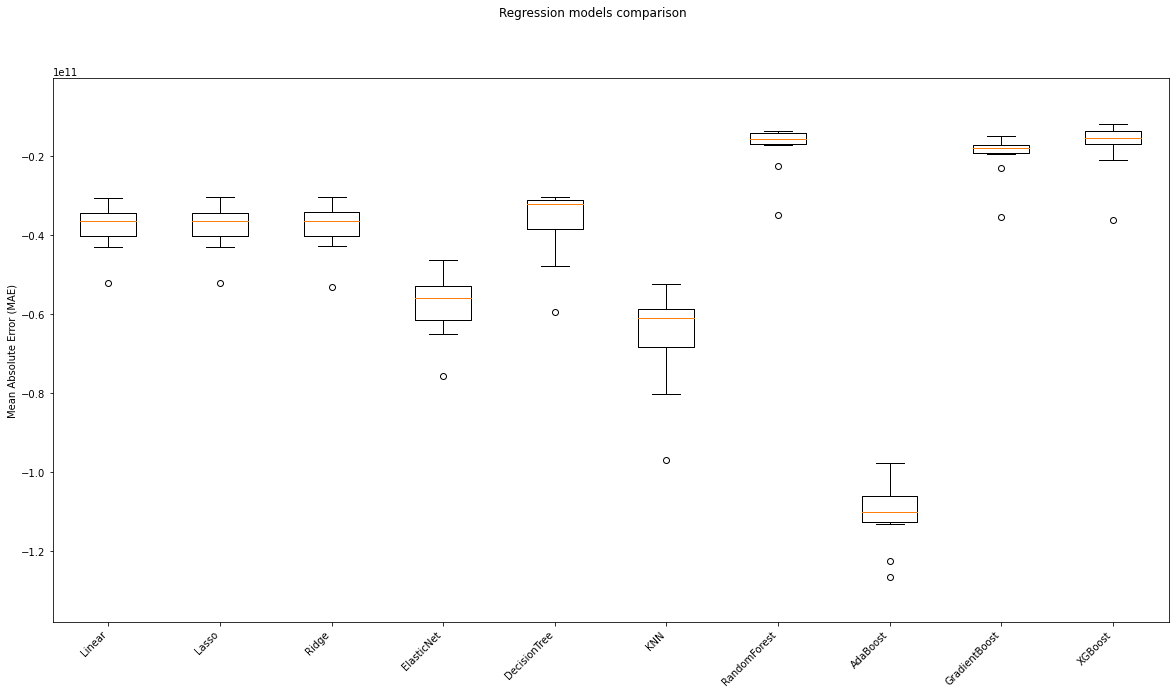

In [60]:
# box-whisker plot to compare regression models
figure = plt.figure(figsize = (20,10))

figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Absolute Error (MAE)")
plt.margins(0.05, 0.1)

In [61]:
# Random Forest and Gradient Boost

In [289]:
model = GradientBoostingRegressor()
model.fit(X_train,y_train)

##print("Intercept : ", model.intercept_)
##print("Slope : ", model.coef_)

#Predicting TEST & TRAIN DATA
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

error_percent = np.mean(np.abs((y_train - train_predict) / y_train)) * 100
print("MAPE - Mean Absolute Percentage Error (TRAIN DATA): ",error_percent )
y_train, train_predict = np.array(y_train), np.array(train_predict)

MAPE - Mean Absolute Percentage Error (TRAIN DATA):  14.831685226676985


In [290]:
model = GradientBoostingRegressor()
model.fit(X_test,y_test)

##print("Intercept : ", model.intercept_)
##print("Slope : ", model.coef_)

#Predicting TEST & TRAIN DATA
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

error_percent = np.mean(np.abs((y_train - train_predict) / y_train)) * 100
print("MAPE - Mean Absolute Percentage Error (TEST DATA): ",error_percent )
y_train, train_predict = np.array(y_train), np.array(train_predict)



MAPE - Mean Absolute Percentage Error (TEST DATA):  15.85010065949541


In [291]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_reg = RandomForestRegressor(n_estimators=200, n_jobs=-1)
rf_reg.fit(X_train,y_train)


# predict the target on the test dataset
rf_reg_predict_test = rf_reg.predict(X_test)

# Accuracy Score on test dataset
rf_reg_rmse_test = mean_squared_error(y_test,rf_reg_predict_test)**(0.5)
print('RMSE on test dataset : ', rf_reg_rmse_test)

rf_reg_r2 = r2_score(y_test,rf_reg_predict_test)
print('R square on test dataset is %1.3f' % r2_score(y_test,rf_reg_predict_test))

RMSE on test dataset :  127786.69966378294
R square on test dataset is 0.878


In [62]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

model = XGBRegressor(learning_rate=0.01,
                                            n_estimators=2000,
                       eta = 0.5,
                                            max_depth=4,
                                            min_child_weight=0,
                                            gamma=0.6,
                                            subsample=0.7,
                                            colsample_bytree=0.5,
                                            objective='reg:linear',
                                            nthread=-1,
                                            scale_pos_weight=1,
                                            seed=27,
                                            reg_alpha=0.00006,
                                            random_state=42,
                      n_jobs=-1)

model.fit(X_train,y_train)


# predict the target on the new test dataset
xgb_predict_test = model.predict(X_test)

# Accuracy Score on test dataset
xgb_rmse_test = mean_squared_error(y_test,xgb_predict_test)**(0.5)
print('\nRMSE on new test dataset : ', xgb_rmse_test)

xgb_r2 = r2_score(y_test, xgb_predict_test)
print('R square is %1.3f' % r2_score(y_test, xgb_predict_test))

[20:10:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.

RMSE on new test dataset :  118000.03989666853
R square is 0.896


In [236]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train,y_train)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))


Fitting 5 folds for each of 54 candidates, totalling 270 fits


KeyboardInterrupt: 

Text(0.5, 1.0, 'Variable Importance')

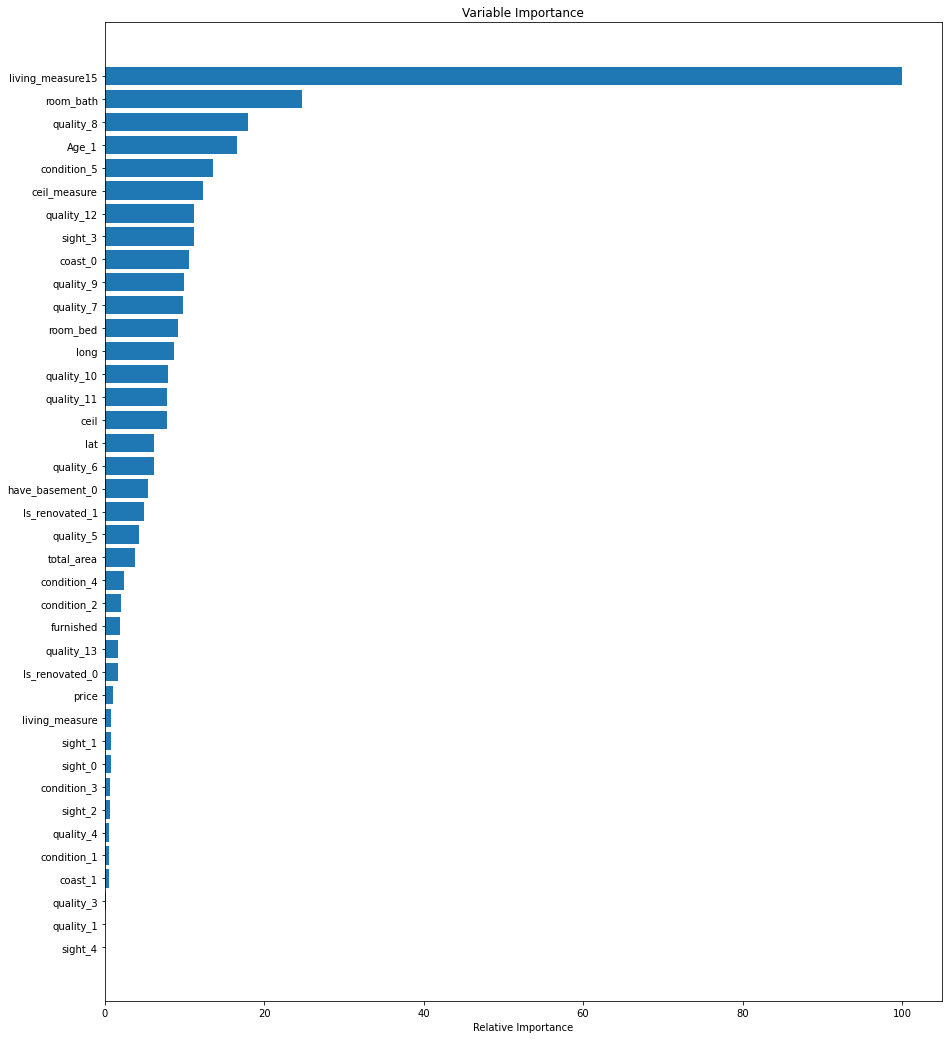

In [293]:
feature_importance = xgboost.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos        = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize = (15,18))

#Make a horizontal bar plot.
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, dummy_data.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

In [310]:
X = dummy_data.drop(columns=['quality_1','quality_3','sight_4','living_measure','sight_1','sight_0','condition_3','sight_2','quality_4','condition_1','coast_1','price'])
y = dummy_data['price']

In [311]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)

In [312]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size = 0.3,random_state = 42)

In [313]:
from xgboost import XGBRegressor
xgboost = XGBRegressor(learning_rate=0.01,
                                            n_estimators=1000,
                       eta = 0.5,
                                            max_depth=6,
                                            min_child_weight=0,
                                            gamma=0.6,
                                            subsample=0.7,
                                            colsample_bytree=0.5,
                                            objective='reg:linear',
                                            nthread=-1,
                                            scale_pos_weight=1,
                                            seed=27,
                                            reg_alpha=0.00006,
                                            random_state=42,
                      n_jobs=-1)

xgboost.fit(X_train,y_train)


# predict the target on the new test dataset
xgb_predict_test = xgboost.predict(X_test)

# Accuracy Score on test dataset
xgb_rmse_test = mean_squared_error(y_test,xgb_predict_test)**(0.5)
print('\nRMSE on new test dataset : ', xgb_rmse_test)

xgb_r2 = r2_score(y_test, xgb_predict_test)
print('R square is %1.3f' % r2_score(y_test, xgb_predict_test))

[16:09:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:09:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.

RMSE on new test dataset :  122284.42500624679
R square is 0.889


In [63]:
model.save_model("model.json")

In [64]:
m1=  XGBRegressor() 

In [65]:
m1.load_model("model.json")

In [66]:
m1.predict(X_test)

array([ 335444.78,  682816.06, 1020507.1 , ...,  213802.67,  225477.66,
        471868.38], dtype=float32)